In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [6]:
# Reading csv file
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# Printing the number of columns in the dataset
print("Number of columns:", df.shape[1])

Number of columns: 14


In [8]:
# Printing the number of columns in the dataset
print("Number of columns:", df.shape[1])

Number of columns: 14


In [9]:
# Printing the first 5 rows of the data.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Printing the datatype, count of non-null rows and datatype of every column in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Gives the statistical details of of every column in the data.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# Checking if there is any null values in the dataset.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploratory Data Analysis

In [13]:
# Count of patients having heart disease
heart_diesase_count = df.target.value_counts()[1]

In [14]:
heart_diesase_count

165

In [15]:
# Count of patients not having heart disease
no_heart_diesase_count = df.target.value_counts()[0]

In [16]:
no_heart_diesase_count

138

Text(0.5, 1.0, 'Count of people with and without heart disease')

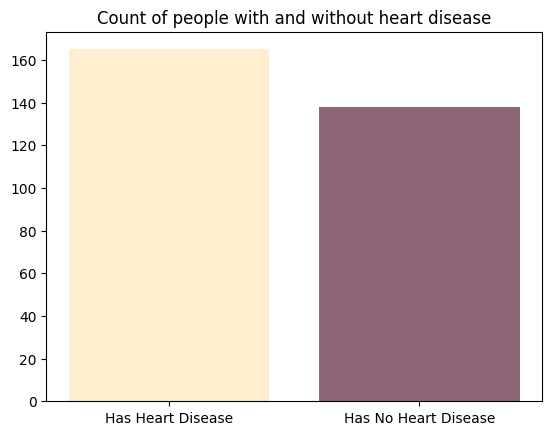

In [17]:
# Plotting the barchart of how many people has heart disease and does not have heart disease
key = np.array(["Has Heart Disease", "Has No Heart Disease"])
# 1 - Has Heart Disease and 0 - Has no Heart Disease
values = np.array([heart_diesase_count, no_heart_diesase_count])
plt.bar(key, values, color = ["#ffeed0", "#8c6677"])
plt.title('Count of people with and without heart disease')

The dataset has more or less equal number of rows with people having and without having heart disease. Therefore, this dataset is essentially a balanced dataset.

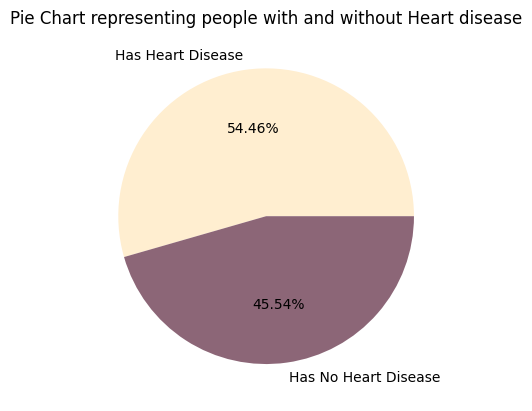

In [18]:
# Pie Chart depicting people with and without heart disease
plt.pie(values, labels = ['Has Heart Disease', 'Has No Heart Disease'], autopct='%1.2f%%',colors = ["#ffeed0", "#8c6677"])
plt.title('Pie Chart representing people with and without Heart disease')
plt.show()

Text(0.5, 1.0, 'Number of Male and Female in the dataset')

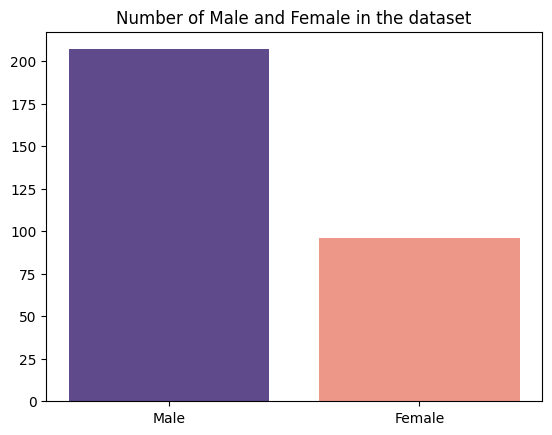

In [19]:
# Plotting the bar chart of how many male and female patients are present in the dataset.
# 1 - Male and 0 - Female
key = np.array(["Male", "Female"])
values = np.array([df.sex.value_counts()[1], df.sex.value_counts()[0]])
plt.bar(key, values, color = ["#5f4b8b", "#ec9787"])
plt.title('Number of Male and Female in the dataset')

[Text(0.5, 1.0, 'Count of Heart patients grouped by Gender')]

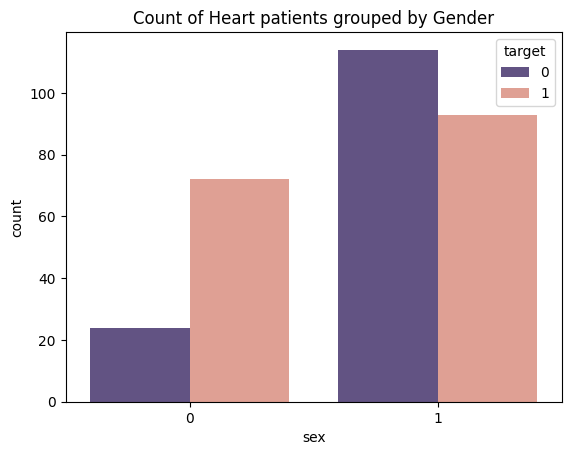

In [20]:
sns.countplot(data= df, x='sex',hue='target', palette=["#5f4b8b", "#ec9787"]).set(title='Count of Heart patients grouped by Gender')

Text(0, 0.5, 'Count')

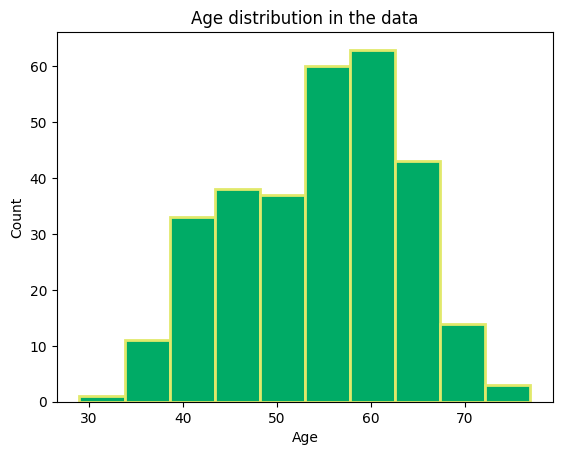

In [21]:
# Representation of people having heart disease based on age-wise category
plt.hist(df['age'], color = "#00ab66", ec="#e1e96b", lw=2)
plt.title('Age distribution in the data')
plt.xlabel('Age')
plt.ylabel('Count')

##### The above histogram shows that the age in the dataset is almost normally distributed

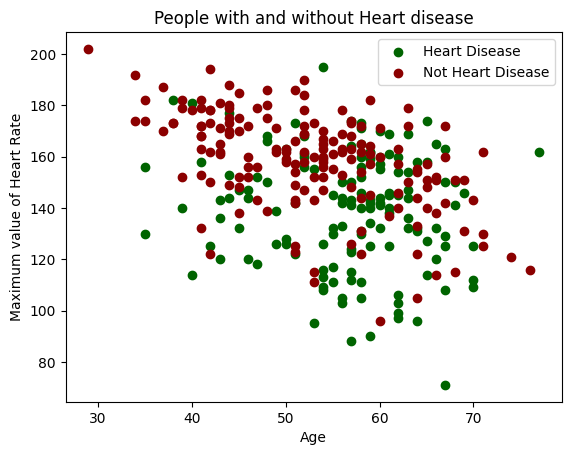

In [22]:
# Scatter plot of people with and without heart disease based on Age vs Maximum value of Heart Rate
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="darkgreen")
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="darkred")
plt.xlabel("Age")
plt.ylabel("Maximum value of Heart Rate")
plt.legend(["Heart Disease", "Not Heart Disease"])
plt.title('People with and without Heart disease')
plt.show()

[Text(0.5, 1.0, 'Chestpain count with respect to target')]

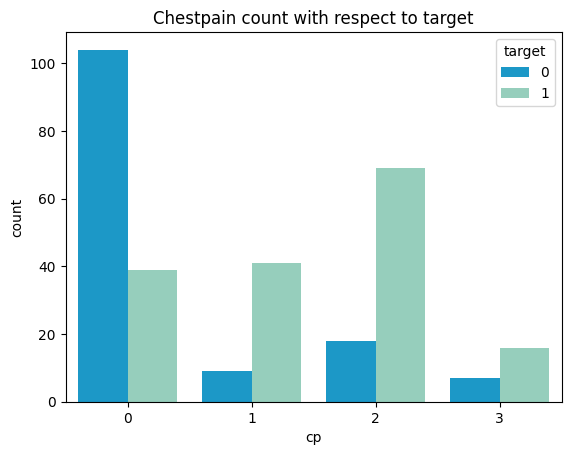

In [23]:
sns.countplot(data= df, x='cp', hue='target', palette=["#00A5E3", "#8DD7BF"]).set(title = "Chestpain count with respect to target")

Text(0.5, 0.98, 'Pie Chart for Chest Pain Type ')

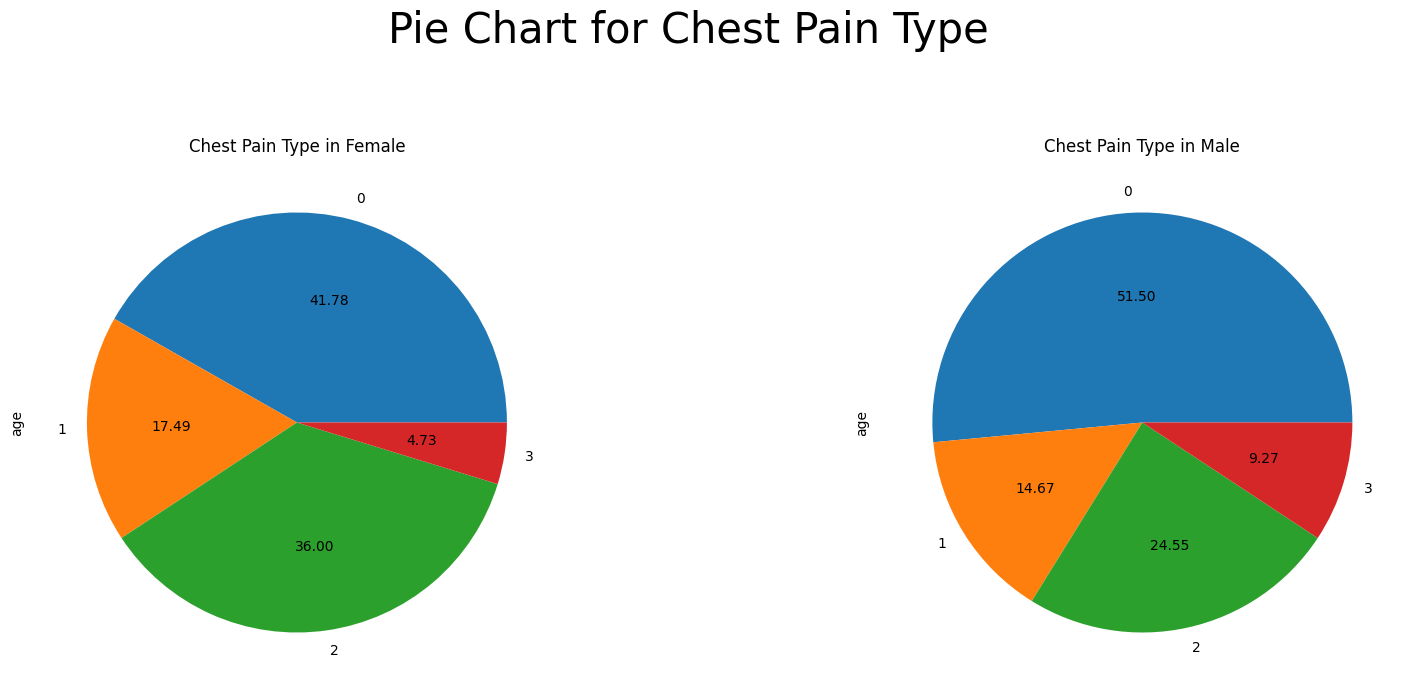

In [24]:
# Representation of people with Chest Pain Type with respect to gender
grid = GridSpec(2, 2)

plt.figure(1, figsize=(20,15))

male_df = df[df['sex'] == 1]
female_df = df[df['sex'] == 0]

plt.subplot(grid[0, 0], aspect=1, title='Chest Pain Type in Female')
female_df.age.groupby(female_df.cp).sum().plot(kind='pie',autopct='%.2f')

plt.subplot(grid[0, 1], aspect=1, title='Chest Pain Type in Male')
male_df.age.groupby(male_df.cp).sum().plot(kind='pie',autopct='%.2f')

plt.suptitle('Pie Chart for Chest Pain Type ', fontsize=30)

In the chest pain (cp) column in dataset each of the following values represents:
#### Value 0: asymptomatic
#### Value 1: atypical angina
#### Value 2: non-anginal pain
#### Value 3: typical angina

Text(0.5, 1.0, 'Representation of Fasting Blood Sugar')

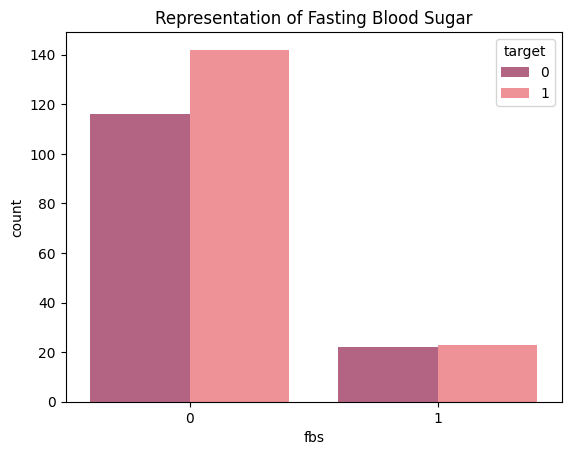

In [25]:
# Classifying count of fasting blood sugar > 120mg/dl whether true or false 
sns.countplot(x="fbs", hue="target", data=df, palette=["#C05780", "#FF828B"]) 
plt.title('Representation of Fasting Blood Sugar')

##### The barchart indicates that the fasting blood sugar with value >120 and <=120, both of these categories have almost same number of heart disease patients count, so the fasting blood sugar value is not advisable to consider as a feature for model.

Text(0.5, 1.0, 'Representation of Cholestrol levels')

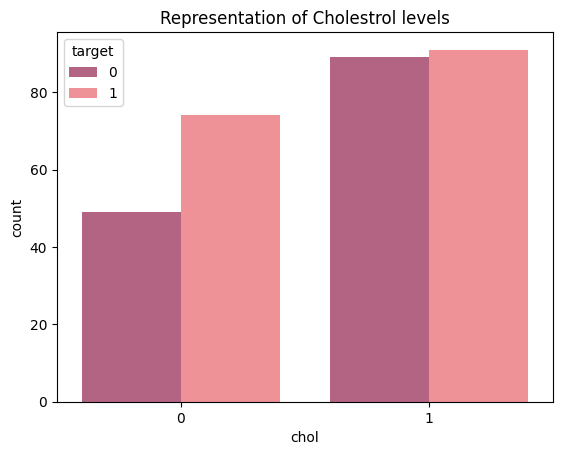

In [26]:
temp_df = df.copy()
temp_df.loc[temp_df['chol'] <= 230, 'chol'] = 0
temp_df.loc[temp_df['chol'] > 230, 'chol'] = 1
temp_df
sns.countplot(x="chol", hue="target", data=temp_df, palette=["#C05780", "#FF828B"]) 
plt.title('Representation of Cholestrol levels')

##### The graph denotes that the number of people having heart disease has the same number of patients having and without having high cholestrol value. Here since in this dataset, the cholestrol value is mg/dl, value above 230 is considered high. So, this is not a essential feature for heart disease prediction according to this dataset.

Text(0.5, 1.0, 'thal count with respect to target')

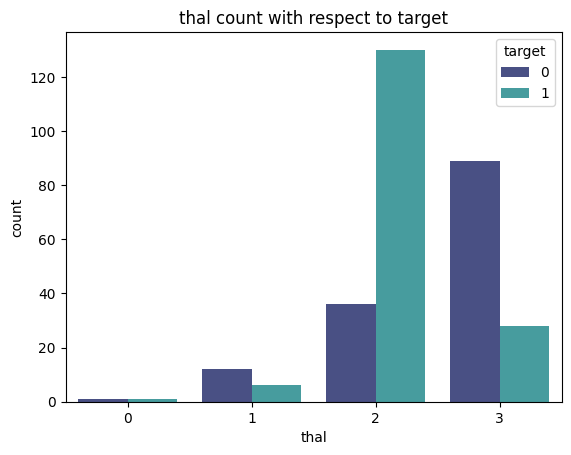

In [27]:
# Representation of thal attribute
sns.countplot(x="thal", hue="target", data=df, palette="mako")
plt.title("thal count with respect to target")